# Python 3

## pandas loc and iloc

In [71]:
# Access a group of rows & columns by labelsor a boolean array
import pandas as pd

In [72]:
df = pd.read_csv('Z:\Excel_Practice\dataset excel\dataset.csv')
df.head(2)

,Order_ID,QTY,Price,Amount,Section
0,100,10,70,700,A
1,101,12,40,480,B


In [73]:
df.loc[0] # it gives single rows

Order_ID    100
QTY          10
Price        70
Amount      700
Section       A
Name: 0, dtype: object

In [74]:
df.loc[[0,1]]
# df.iloc[[0,1]]

,Order_ID,QTY,Price,Amount,Section
0,100,10,70,700,A
1,101,12,40,480,B


In [75]:
# for specific value
df.loc[0,'QTY']

10

In [76]:
df.loc[0:3,'Price']

0     70
1     40
2    210
3    599
Name: Price, dtype: int64

In [77]:
df.loc[df['Price']>500]

,Order_ID,QTY,Price,Amount,Section
3,103,5,599,2995,D
4,104,8,1250,10000,B
6,106,50,799,39950,A


In [78]:
df.loc[df['Price']>500,['Amount']] # price is above 500 but i want amount whould be shown

,Amount
3,2995
4,10000
6,39950


## iloc()
### integer location based index

In [79]:
# df.loc[[0]] # same result
df.iloc[[0]]

,Order_ID,QTY,Price,Amount,Section
0,100,10,70,700,A


In [80]:
df.iloc[:,0] # : = all rows

0    100
1    101
2    102
3    103
4    104
5    105
6    106
7    107
8    108
Name: Order_ID, dtype: int64

In [81]:
df.iloc[[False,True,True,True,True,True,False,False,False]] #=?? 

,Order_ID,QTY,Price,Amount,Section
1,101,12,40,480,B
2,102,5,210,1050,C
3,103,5,599,2995,D
4,104,8,1250,10000,B
5,105,20,300,6000,D


# Group by 

In [82]:
# in which way we have to make group by 
gr1 = df.groupby('Section')
gr1

In [83]:
gr1.groups # it shows section by index

{'A': [0, 6], 'B': [1, 4], 'C': [2, 7], 'D': [3, 5, 8]}

In [84]:
df.groupby(['Section','Amount']).groups
# show group value by section and amount

{('A', 700): [0], ('A', 39950): [6], ('B', 480): [1], ('B', 10000): [4], ('C', 1050): [2], ('C', 2000): [7], ('D', 1550): [8], ('D', 2995): [3], ('D', 6000): [5]}

In [85]:
for i in gr1:
    print(list(i))


['A',    Order_ID  QTY  Price  Amount Section
0       100   10     70     700       A
6       106   50    799   39950       A]
['B',    Order_ID  QTY  Price  Amount Section
1       101   12     40     480       B
4       104    8   1250   10000       B]
['C',    Order_ID  QTY  Price  Amount Section
2       102    5    210    1050       C
7       107   10    200    2000       C]
['D',    Order_ID  QTY  Price  Amount Section
3       103    5    599    2995       D
5       105   20    300    6000       D
8       108    5    310    1550       D]


In [86]:
print(dict(list(gr1)))

{'A':    Order_ID  QTY  Price  Amount Section
0       100   10     70     700       A
6       106   50    799   39950       A, 'B':    Order_ID  QTY  Price  Amount Section
1       101   12     40     480       B
4       104    8   1250   10000       B, 'C':    Order_ID  QTY  Price  Amount Section
2       102    5    210    1050       C
7       107   10    200    2000       C, 'D':    Order_ID  QTY  Price  Amount Section
3       103    5    599    2995       D
5       105   20    300    6000       D
8       108    5    310    1550       D}


In [87]:
gr2 = df.groupby('Section').get_group('A') # group by a specific object or int
gr2

,Order_ID,QTY,Price,Amount,Section
0,100,10,70,700,A
6,106,50,799,39950,A


In [88]:
gr2.sum() # sum all columns
# gr2.mean() # it will not work all values should be in numerical if we remove it will work

Order_ID      206
QTY            60
Price         869
Amount      40650
Section        AA
dtype: object

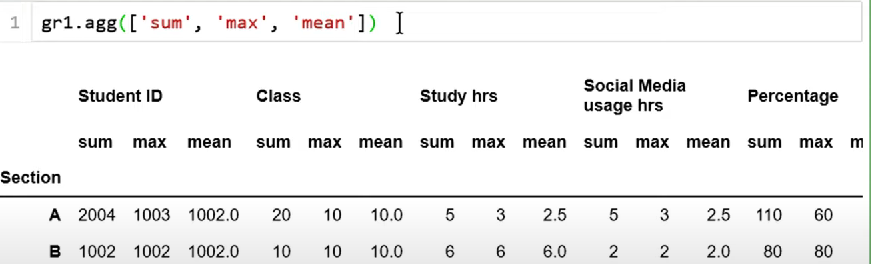

# Merging Function

In [89]:
# merge function connects columns and index
df1 = pd.DataFrame({'num':[1,2,3,4],'word':['a','b','c','d']})
df1

,num,word
0,1,a
1,2,b
2,3,c
3,4,d


In [90]:
df2 = pd.DataFrame({'num':[1,2,3,5],'aplhabet':['e','f','g','h']})
df2

,num,aplhabet
0,1,e
1,2,f
2,3,g
3,5,h


In [91]:
pd.merge(df1,df2,on='num')

,num,word,aplhabet
0,1,a,e
1,2,b,f
2,3,c,g


In [92]:
pd.merge(df2,df1,on='num')

,num,aplhabet,word
0,1,e,a
1,2,f,b
2,3,g,c


In [93]:
# sql using python by using merge = how(parameter) / 'left', 'right', 'outer', 'inner', 'cross'
pd.merge(df1,df2,on='num',how='left') 

,num,word,aplhabet
0,1,a,e
1,2,b,f
2,3,c,g
3,4,d,NaN


In [94]:
pd.merge(df1,df2,on='num',how='right',indicator=True) # default false indicator shows that in which values are from dataset 

,num,word,aplhabet,_merge
0,1,a,e,both
1,2,b,f,both
2,3,c,g,both
3,5,NaN,h,right_only


In [95]:
df3 = pd.DataFrame({'num':[6,7,8,9],'aplhabet':['i','j','k','l']})
df3

,num,aplhabet
0,6,i
1,7,j
2,8,k
3,9,l


In [96]:
# when we have multi index and have different values
pd.merge(df1,df3,left_index = True, right_index = True) # it will not work without left/right index

,num_x,word,num_y,aplhabet
0,1,a,6,i
1,2,b,7,j
2,3,c,8,k
3,4,d,9,l


In [97]:
# both dataset have same values
df4 = pd.DataFrame({'num':[6,7,8,9],'alphabet':['i','j','k','l']})
df4
df5 = pd.DataFrame({'num':[6,7,8,9],'alphabet':['i','j','k','l']})
df5
pd.merge(df4,df5,on='num')
# we can chnage name by using suffix

,num,alphabet_x,alphabet_y
0,6,i,i
1,7,j,j
2,8,k,k
3,9,l,l
